In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
data = pd.read_csv('Kobe.csv')

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
target = 'shot_made_flag'

In [5]:
data.shot_made_flag.unique()

array([nan,  0.,  1.])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [7]:
del data['game_event_id']
del data['game_id']
del data['team_id']

In [8]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('nan')


#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['shot_id', 'shot_made_flag'])]

In [9]:
data_noNan=data.dropna(subset = ['shot_made_flag'])

In [10]:
data_noNan.shot_made_flag.unique()

array([0., 1.])

In [11]:
import seaborn as sns
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass 

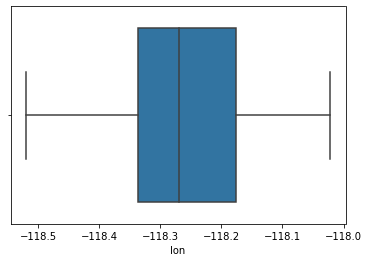

In [12]:
get_boxplot(data_noNan,columns=['lon'])

In [13]:
data_noNan.lon[(data['lon']<= -118.3)] = 10
data_noNan.lon[(data['lon']> -118.3)] = 11
data_noNan.lon.unique()

array([10., 11.])

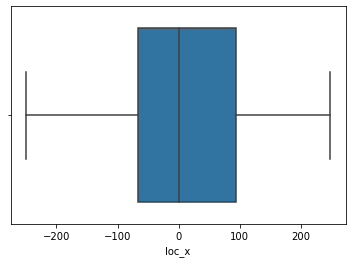

In [14]:
get_boxplot(data_noNan,columns=['loc_x'])

In [15]:
data_noNan.loc_x[(data['loc_x']< 0)] = 5
data_noNan.loc_x[(data['loc_x']>= 0)] = 10
data_noNan.loc_x.unique()

array([ 5, 10])

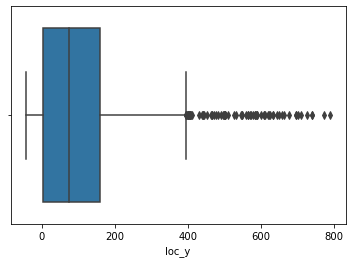

In [16]:
get_boxplot(data_noNan,columns=['loc_y'])


In [17]:
data_noNan['loc_y'] = np.log(data['loc_y'])

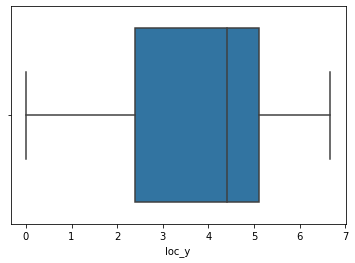

In [18]:
get_boxplot(data_noNan,columns=['loc_y'])

In [19]:
data_noNan.loc_y[(data['loc_y']< 2)|(data['loc_y']> 5)] = 2
data_noNan.loc_y[(data['loc_y']>=2)&(data['loc_y']<= 3)] = 3
data_noNan.loc_y[(data['loc_y']> 3)&(data['loc_y']<= 4)] = 4
data_noNan.loc_y[(data['loc_y']> 4)&(data['loc_y']<= 5)] = 5
data_noNan.loc_y.unique()

array([2., 4., 3., 5.])

In [20]:
data_noNan.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [21]:
#df = pd.DataFrame(data_noNan, columns= ['season'])
#data_noNan['season'] = df['season'].str[:4]

#df = pd.DataFrame(data_noNan, columns= ['game_date'])
#data_noNan['game_date'] = df['game_date'].str[:4]

In [22]:
data_noNan.shot_zone_range.unique()

array(['8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [23]:
data_noNan.shot_zone_range[(data['shot_zone_range']=='8-16 ft.')] = 12
data_noNan.shot_zone_range[(data['shot_zone_range']=='16-24 ft.')] = 20
data_noNan.shot_zone_range[(data['shot_zone_range']=='Less Than 8 ft.')] = 12
data_noNan.shot_zone_range[(data['shot_zone_range']=='24+ ft.')] = 28
data_noNan.shot_zone_range[(data['shot_zone_range']=='Back Court Shot')] = 1

In [24]:
data_noNan.lat[(data['lat']< 34)] = 33
data_noNan.lat[(data['lat']> 34)] = 34
data_noNan.lat.unique()

array([34., 33.])

In [25]:
data_noNan.head()

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,34.0,5,2.0,10.0,10,1,0,2000-01,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,12,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,33.0,5,2.0,10.0,7,1,0,2000-01,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,20,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,33.0,10,2.0,11.0,6,1,0,2000-01,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,20,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,34.0,10,2.0,11.0,6,2,0,2000-01,...,1.0,2PT Field Goal,Center(C),Restricted Area,12,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,34.0,5,2.0,10.0,9,3,0,2000-01,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,12,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [26]:
data_noNan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   lat                 25697 non-null  float64
 3   loc_x               25697 non-null  int64  
 4   loc_y               25697 non-null  float64
 5   lon                 25697 non-null  float64
 6   minutes_remaining   25697 non-null  int64  
 7   period              25697 non-null  int64  
 8   playoffs            25697 non-null  int64  
 9   season              25697 non-null  object 
 10  seconds_remaining   25697 non-null  int64  
 11  shot_distance       25697 non-null  int64  
 12  shot_made_flag      25697 non-null  float64
 13  shot_type           25697 non-null  object 
 14  shot_zone_area      25697 non-null  object 
 15  shot_zone_basic     25697 non-null  object 
 16  shot

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

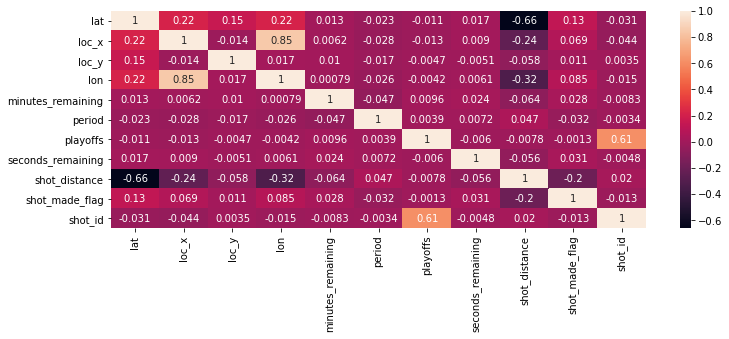

In [28]:
corr = data_noNan.corr()
plt.figure(figsize=[12,4])
sns.heatmap(corr, annot=True)

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
# Разбиваем на train/test
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=55)

for train_index, test_index in splitter.split(data_noNan, data_noNan.shot_made_flag):
    d_train = data_noNan.iloc[train_index]
    d_test = data_noNan.iloc[test_index]
    
    y_train = data_noNan['shot_made_flag'].iloc[train_index]
    y_test = data_noNan['shot_made_flag'].iloc[test_index]

In [31]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(d_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(d_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]


# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([d_train[num_feat].fillna(-999),
                     dummy_train], axis=1)

X_test = pd.concat([d_test[num_feat].fillna(-999),
                     dummy_test], axis=1)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
#train the model
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
predictions = model.predict_proba(X_test)

In [36]:
#evaluate the score of the train set
model.score(X_train, y_train)

0.6792127647745594

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=22)
pca.fit(X_train)

PCA(n_components=22)

In [39]:
print(pca.explained_variance_ratio_)

[7.28481367e-01 2.11339213e-01 2.81770151e-02 1.35285807e-02
 3.13191523e-03 1.71650306e-03 7.84137526e-04 5.66810234e-04
 3.68833927e-04 3.43856282e-04 3.26827631e-04 3.08572713e-04
 2.30228418e-04 2.28342314e-04 2.15273250e-04 2.03095815e-04
 2.00536886e-04 1.89364283e-04 1.86808781e-04 1.85707882e-04
 1.81942791e-04 1.77054023e-04]


In [40]:
print(pca.singular_values_)

[2353.85798126 1267.83014977  462.93340949  320.77251646  154.3391243
  114.2597641    77.22664211   65.65833633   52.96469357   51.13985759
   49.85749052   48.44509282   41.84566726   41.67390831   40.46374419
   39.30262158   39.05423778   37.95072409   37.6937786    37.5825463
   37.19961621   36.69643986]


In [41]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [42]:
def show_auc(y, y_pred, plot_label='', prin=True):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

Train LR:
ROC AUC: 0.7050
Test LR:
ROC AUC: 0.6907


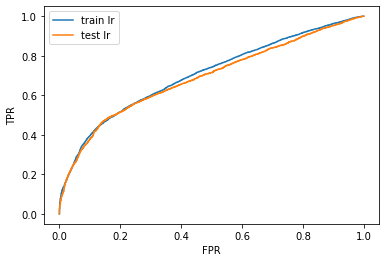

In [43]:
my_pred_test_lr = model.predict_proba(X_test)[:, 1]
my_pred_train_lr = model.predict_proba(X_train)[:, 1]


print('Train LR:')
show_auc(y_train, my_pred_train_lr, 'train lr')
print('Test LR:')
show_auc(y_test, my_pred_test_lr, 'test lr')


plt.legend();

Text(0, 0.5, 'weights')

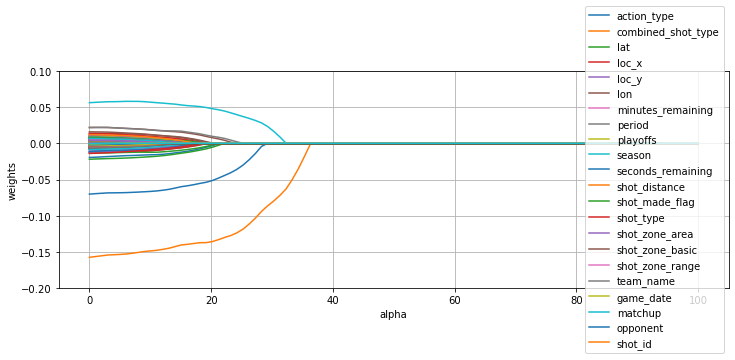

In [44]:
from sklearn.linear_model import  Lasso
from sklearn.preprocessing import StandardScaler


X_sc = StandardScaler().fit_transform(X_train)
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

for i in range(len(list_l)):
  m_l = Lasso(alpha=list_l[i]).fit(X_sc, y_train)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

plt.figure(figsize=[12,4])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.2,0.1)  
plt.legend(data.columns,loc = 5)      
plt.grid() 
plt.xlabel('alpha')
plt.ylabel('weights')

In [45]:
lasso_clf = Lasso(alpha=0.1)

In [46]:
lasso_clf.fit(X_train, y_train)

Lasso(alpha=0.1)

Train lasso:
ROC AUC: 0.6115
Test lasso:
ROC AUC: 0.6108


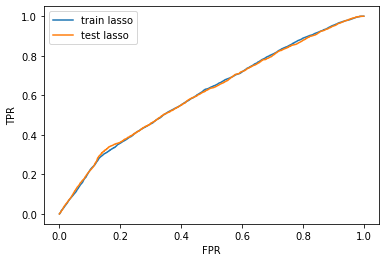

In [47]:
my_pred_test_lasso = lasso_clf.predict(X_test)
my_pred_train_lasso = lasso_clf.predict(X_train)


print('Train lasso:')
show_auc(y_train, my_pred_train_lasso, 'train lasso')
print('Test lasso:')
show_auc(y_test, my_pred_test_lasso, 'test lasso')


plt.legend();

In [48]:
from sklearn.linear_model import Ridge

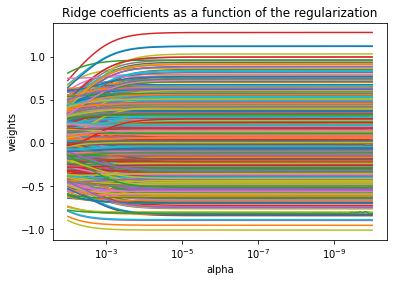

In [49]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)


# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


In [50]:
ridge_clf = Ridge(alpha=200)
ridge_clf.fit(X_train, y_train)

Ridge(alpha=200)

Train ridge:
ROC AUC: 0.7144
Test ridge:
ROC AUC: 0.6955


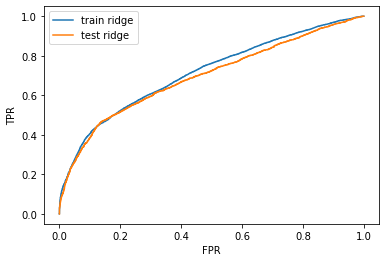

In [51]:
my_pred_test_ridge = ridge_clf.predict(X_test)
my_pred_train_ridge = ridge_clf.predict(X_train)


print('Train ridge:')
show_auc(y_train, my_pred_train_ridge, 'train ridge')
print('Test ridge:')
show_auc(y_test, my_pred_test_ridge, 'test ridge')


plt.legend();

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной